In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('sales.csv')

In [4]:
df.duplicated().sum()

0

In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data preprocessing

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [83]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [84]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [85]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [86]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

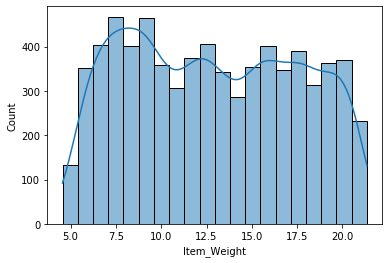

In [87]:
sns.histplot( data=df,x='Item_Weight',kde=True);

In [88]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [89]:
y=df.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
y

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [90]:
df['Outlet_Type'].values

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1', ...,
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1'],
      dtype=object)

In [91]:
def fill(l):
    if 'Grocery Store' in df['Outlet_Type'].values:
        return 'Small'
    if 'Supermarket Type1' in df['Outlet_Type'].values:
        return 'Small'
    if 'Supermarket Type2' in df['Outlet_Type'].values:
        return 'Medium'
    if 'Supermarket Type3' in df['Outlet_Type'].values:
        return 'Medium'

In [92]:
missing=df['Outlet_Size'].isnull()

In [93]:
df.loc[missing,'Outlet_Size']=df['Outlet_Size'].apply(fill)

In [94]:
df.loc[range(20),['Outlet_Size','Outlet_Type']]

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,Small,Grocery Store
4,High,Supermarket Type1
5,Medium,Supermarket Type2
6,High,Supermarket Type1
7,Medium,Supermarket Type3
8,Small,Supermarket Type1
9,Small,Supermarket Type1


In [95]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [114]:
df['Item_Visibility'].describe()

count    8337.000000
mean        0.066358
std         0.051838
min         0.000000
25%         0.027028
50%         0.053939
75%         0.095299
max         0.328391
Name: Item_Visibility, dtype: float64

In [115]:
df['Item_Visibility'].replace(0,df['Item_Visibility'].mean(),inplace=True)

## Data Analysis 

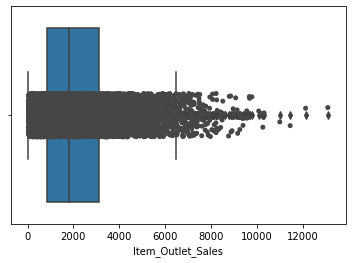

In [96]:
sns.boxplot(data=df,x='Item_Outlet_Sales');
sns.stripplot(x='Item_Outlet_Sales', data=df, color="#474646");

In [97]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

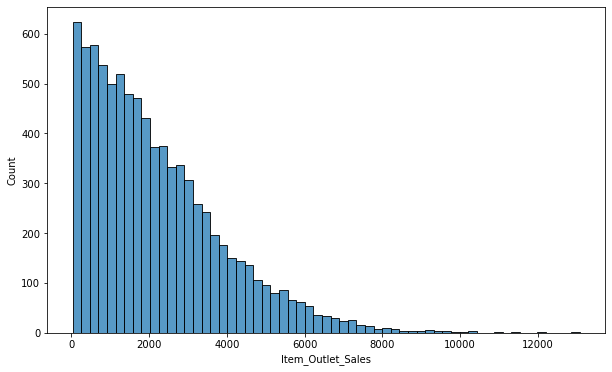

In [98]:
plt.figure(figsize=(10,6));
sns.histplot(df['Item_Outlet_Sales']);

In [7]:
dis_outliers = detect_outliers(df, 0, ['Item_Outlet_Sales'])
len(dis_outliers)

186

In [101]:
df.drop(index = dis_outliers, inplace=True)

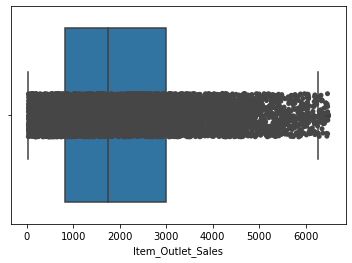

In [102]:
sns.boxplot(data=df,x='Item_Outlet_Sales');
sns.stripplot(x='Item_Outlet_Sales', data=df, color="#474646");

In [103]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.856638,0.066358,139.161087,1997.968094,2059.362844
std,4.250410,0.051838,61.553351,8.309941,1506.099754
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027028,93.046200,1987.000000,810.944400
50%,12.857645,0.053939,141.215400,1999.000000,1747.059200
75%,16.100000,0.095299,183.695000,2004.000000,2998.097400
max,21.350000,0.328391,266.888400,2009.000000,6478.234000


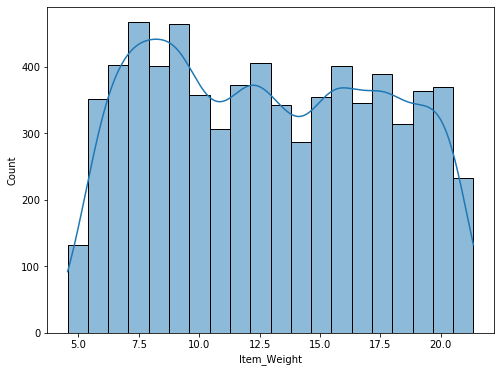

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df['Item_Weight'],kde=True);

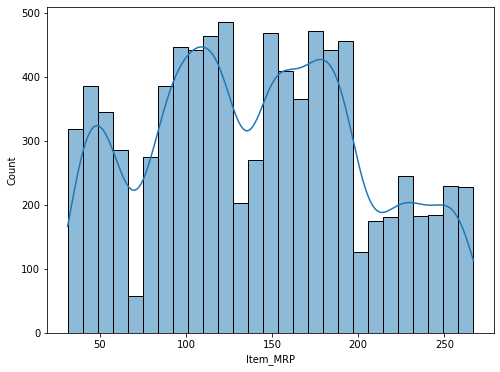

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['Item_MRP'],kde=True);

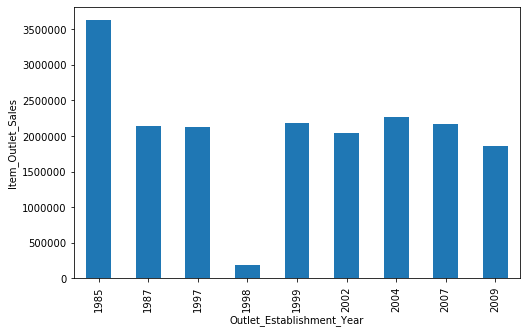

In [9]:
plt.figure(figsize=(8,5))
df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().plot(kind='bar');
plt.ylabel('Item_Outlet_Sales');

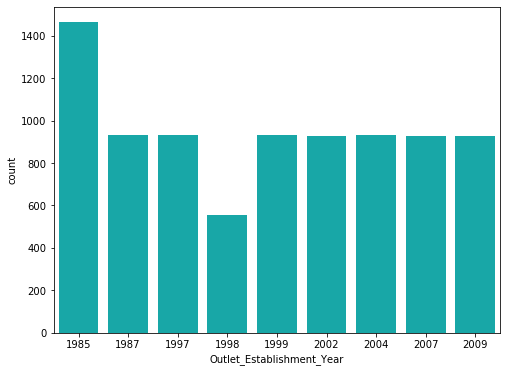

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Establishment_Year'],color='c');

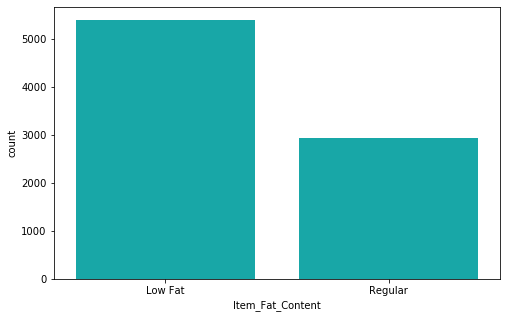

In [108]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,color='c');

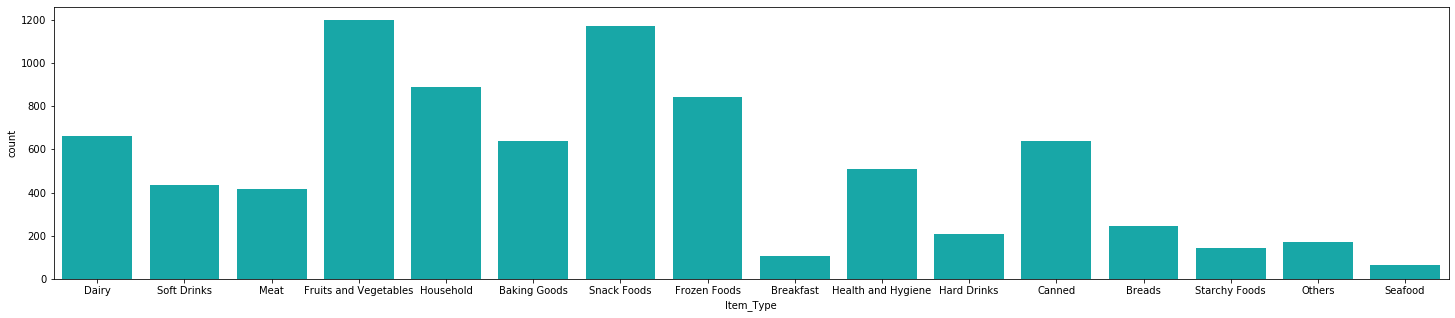

In [109]:
plt.figure(figsize=(25,5))
sns.countplot('Item_Type',data=df,color='c');

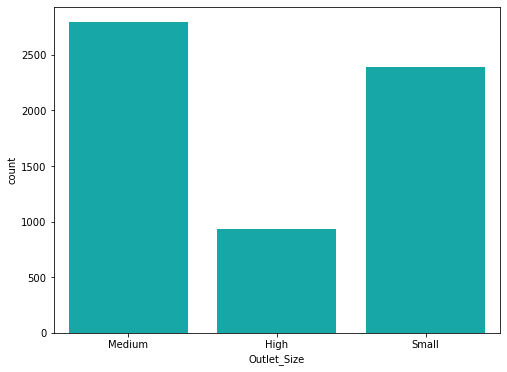

In [17]:
plt.figure(figsize=(8,6))
sns.countplot('Outlet_Size',data=df,color='c');

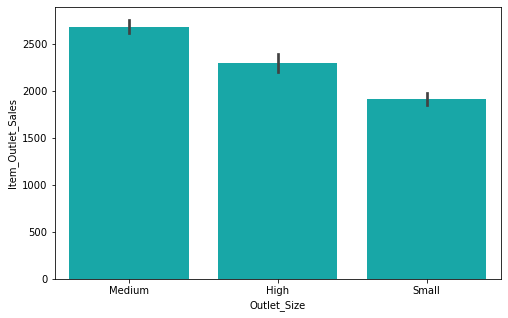

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,color='c');

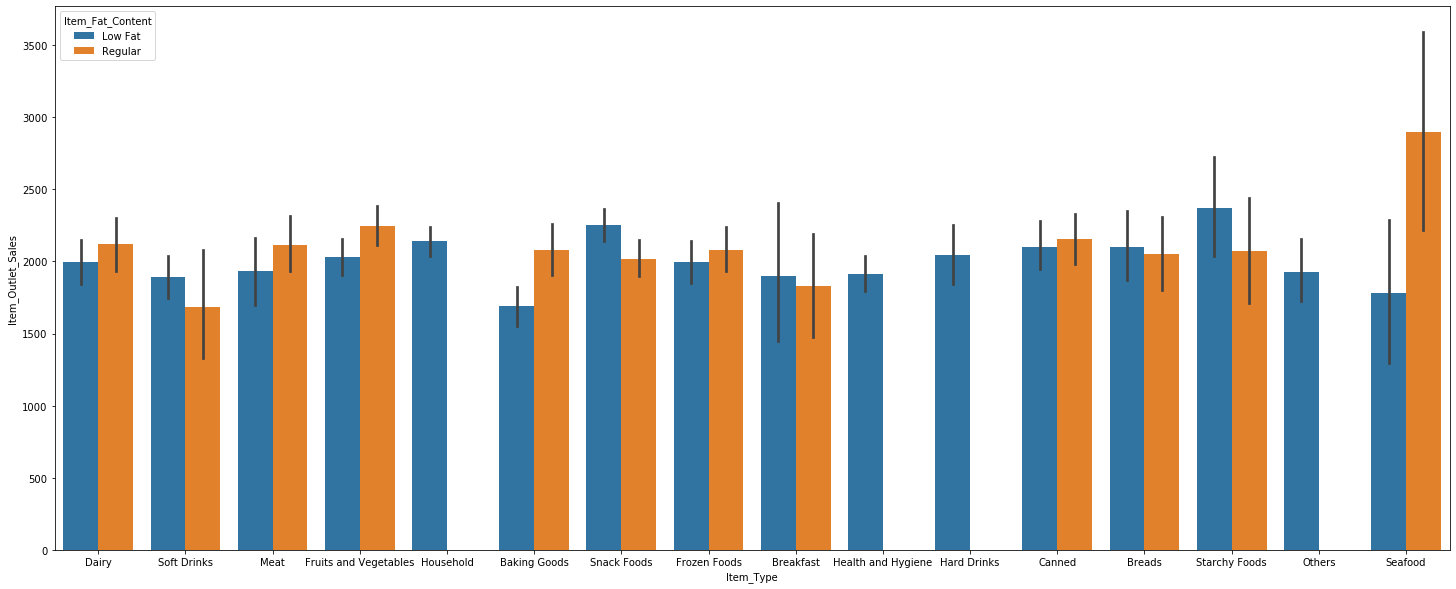

In [112]:
 plt.figure(figsize=(25,10))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df);

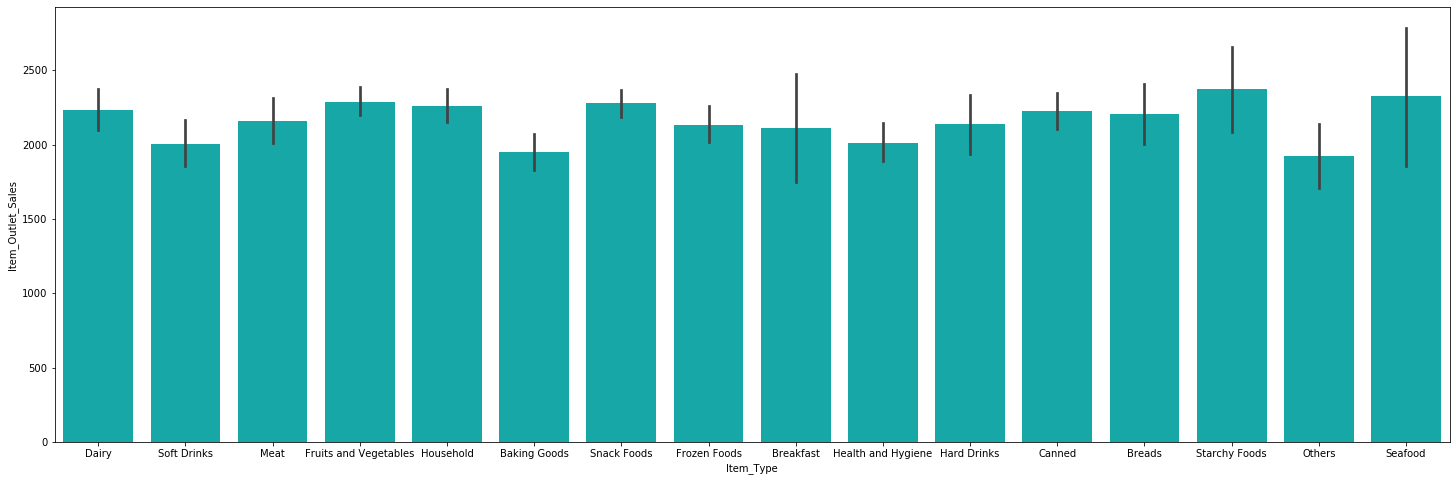

In [37]:
plt.figure(figsize=(25,8))
sns.barplot(y='Item_Outlet_Sales',x='Item_Type',data=df,color='c')

In [147]:
df.drop(['Item_Identifier'],axis=1,inplace=True)

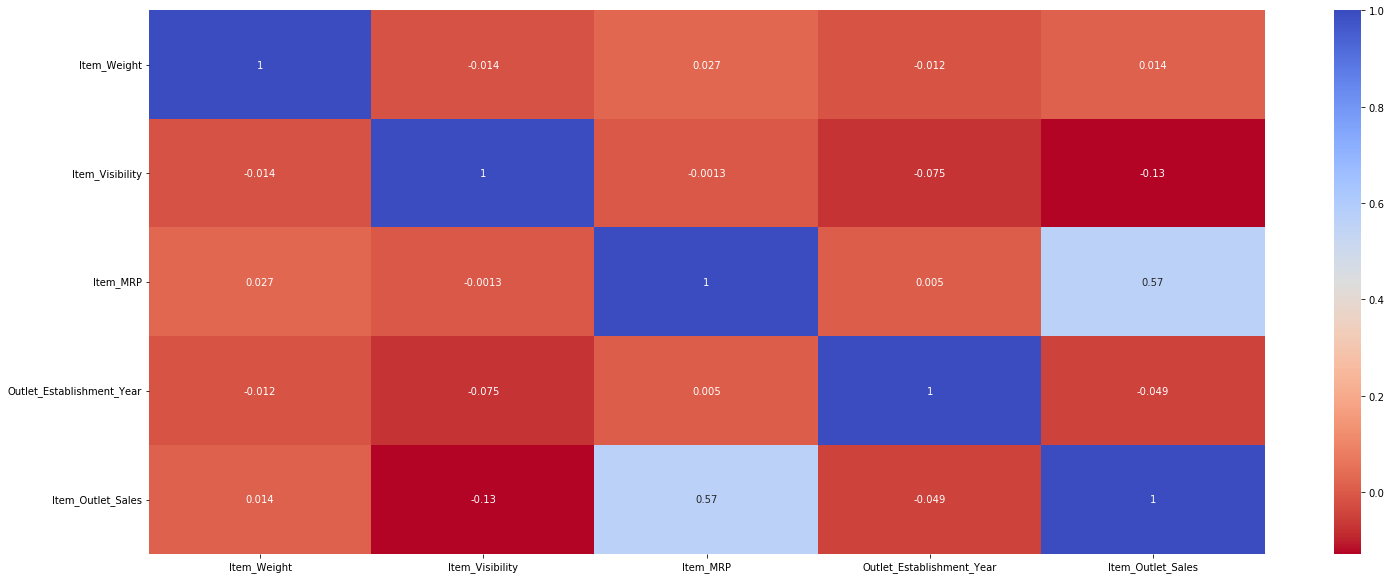

In [18]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), cmap="coolwarm_r", annot=True);

## Machine learning

In [116]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [117]:
#df = df.drop(['Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [118]:
x= df[['Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y= df['Item_Outlet_Sales']

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=['Item_Weight','Item_MRP']
scaler.fit(x_train[num_cols])

StandardScaler()

In [121]:
num_cols=['Item_Weight','Item_MRP']
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [123]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [124]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.4729459648562159
Test Score: 0.5016355566635755
------------------------------
Using model: KNNR
Training Score: 0.6582446490271903
Test Score: 0.5052592955934703
------------------------------
Using model: SVR
Training Score: 0.012061039774122762
Test Score: 0.0022425384790552005
------------------------------
Using model: DT
Training Score: 0.9979271688733459
Test Score: 0.16061552617998864
------------------------------
Using model: RF
Training Score: 0.93060837489654
Test Score: 0.5358836320553473
------------------------------
Using model: XGBR
Training Score: 0.807470812496604
Test Score: 0.5476083760423094
------------------------------


In [125]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,random_state=22)

RF.fit(x_train,y_train)

y_pred = RF.predict(x_test)

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6027481399518533

In [127]:
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')  


Training Score: 0.807470812496604
Test Score: 0.5476083760423094


In [128]:
import joblib

In [129]:
joblib.dump(RF,'RF.h5')

['RF.h5']

In [130]:
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [134]:
x.head(10)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,0,4,249.8092,1,0,1
1,5.920000,1,14,48.2692,1,2,2
2,17.500000,0,10,141.6180,1,0,1
3,19.200000,1,6,182.0950,2,2,0
4,8.930000,0,9,53.8614,0,2,1
5,10.395000,1,0,51.4008,1,2,2
6,13.650000,1,13,57.6588,0,2,1
7,12.857645,0,13,107.7622,1,2,3
8,16.200000,1,5,96.9726,2,1,1
9,19.200000,1,5,187.8214,2,1,1


In [132]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [154]:
def item_fat(fat):
    return 0 if fat.lower().strip()=='low fat' else 1

def product_type(product):
    if product.lower().strip()=='baiking goods':
        return 0
    if product.lower().strip()=='breads':
        return 1
    if product.lower().strip()=='breakfast':
        return 2
    if product.lower().strip()=='canned':
        return 3
    if product.lower().strip()=='Dairy':
        return 4
    if product.lower().strip()=='Frozen Food':
        return 5
    if product.lower().strip()=='fruits and vegetables':
        return 6
    if product.lower().strip()=='hard drinks':
        return 7
    if product.lower().strip()=='health and hygiene':
        return 8
    if product.lower().strip()=='household':
        return 9
    if product.lower().strip()=='meat':
        return 10
    if product.lower().strip()=='others':
        return 11
    if product.lower().strip()=='seafood':
        return 12
    if product.lower().strip()=='snak Food':
        return 13
    if product.lower().strip()=='soft drinks':
        return 14
    if product.lower().strip()=='strachy food':
        return 15


def size(size):
    if size.lower().strip()=='small':
        return 2
    if size.lower().strip()=='medium':
        return 1
    else:
        return 0

def population(population):
    if population.lower().strip()=='tier 1':
        return 0
    if population.lower().strip()=='tier 2':
        return 1
    else:
        return 2

def market_type(market):
    if market.lower().strip()=='Supermarket Type1':
        return 1
    if market.lower().strip()=='Supermarket Type2':
        return 2
    if market.lower().strip()=='Supermarket Type3':
        return 3
    else:
        return 0

In [155]:
def preprocess(data):
    Item_Weight = data['weight']
    
    Item_Fat_Content=item_fat(data['fat'])
    
    Item_Type=product_type(data['product'])
    
    Item_MRP=data['price']
    
    Outlet_Size =size(data['size'])
    
    Outlet_Location_Type= population(data['population'])
    
    Outlet_Type=market_type(data['market'])
    
    final_data = [Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type]
    
    return final_data


In [160]:
x.columns.values

array(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], dtype=object)

In [158]:
RF=joblib.load('RF.h5')
scaler=joblib.load('scaler.h5')